In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trainmain=pd.read_csv("C:\\Users\kaushik\Desktop\ML\independence day hackathon\\train.csv")
testmain=pd.read_csv("C:\\Users\kaushik\Desktop\ML\independence day hackathon\\test.csv")

In [3]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
def uniquevalues(df):
    for col in df.columns:
        if df[col].dtype=='O':
            print("The unique values of {0} is {1}".format(col,df[col].nunique()))
            
# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category,drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns    

def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

def dateformatchange(date):
    Month=date.split('-')[0]
    Year="20"+ date.split('-')[1]
    monthnum=d.get(Month)
    newdate= "0" + str(monthnum) + "/" + Year
    return newdate

def checkmvalue(df):
    allm=['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11']
    j=0
    for i in allm:
        if df[i]>0:
            j=1
    return j  
def checknummissed(df):
    allm=['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11']
    j=0
    for i in allm:
        if df[i]>0:
            j=j+1
    return j 

def checkmaxmissed(df):
    allm=['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11']
    j=df[allm].max()
    return j

In [4]:
df=trainmain.copy()
df_test=testmain.copy()
df.drop('loan_id',axis=1,inplace=True)
df_test.drop('loan_id',axis=1,inplace=True)
df_test['origination_date'] =pd.to_datetime(df_test['origination_date']).dt.strftime('%Y-%d-%m')
d = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12 }
df_test['first_payment_date']=df_test['first_payment_date'].apply(dateformatchange)

In [5]:
import datetime

now = datetime.datetime.now()
today=now.strftime("%Y-%m-%d")
df['loan_age_months'] =  (pd.to_datetime(today)-pd.to_datetime(df.origination_date))/np.timedelta64(1,'M')
df['loan_age_months'] = df['loan_age_months'].astype(int)
df['remaining_months']=df['loan_term']-df['loan_age_months']

In [6]:
df_test['loan_age_months'] =  (pd.to_datetime(today)-pd.to_datetime(df_test.origination_date))/np.timedelta64(1,'M')
df_test['loan_age_months'] = df_test['loan_age_months'].astype(int)
df_test['remaining_months']=df_test['loan_term']-df_test['loan_age_months']

In [7]:
df['mothly_amount']=(df['unpaid_principal_bal']/df['remaining_months'])

In [8]:
df_test['mothly_amount']=(df_test['unpaid_principal_bal']/df_test['remaining_months'])

In [201]:
df['flagm']= df.apply(lambda row: checkmvalue(row), axis = 1)
df_test['flagm']= df_test.apply(lambda row: checkmvalue(row), axis = 1) 

In [202]:
df['flagmmissedno']= df.apply(lambda row: checknummissed(row), axis = 1)
df_test['flagmmissedno']= df_test.apply(lambda row: checknummissed(row), axis = 1)

In [203]:
df['flagmmaxmissed']= df.apply(lambda row: checkmaxmissed(row), axis = 1)
df_test['flagmmaxmissed']= df_test.apply(lambda row: checkmaxmissed(row), axis = 1)

In [9]:
X=df.drop('m13',axis=1)
y=df['m13']


In [10]:
X, cat_cols = one_hot_encoder(X, False)
df, cat_cols = one_hot_encoder(df, False)
df_test, cat_cols = one_hot_encoder(df_test, False)

In [175]:

from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_classif



selector = SelectKBest(f_classif, k=10)

selected_features = selector.fit_transform(X, y)

In [177]:

fea_imp_ = pd.DataFrame({'cols':X.columns, 'fea_imp':selector.scores_})
fea_imp_ =fea_imp_.sort_values(by=['fea_imp'], ascending = False).reset_index(drop=True)

In [181]:

from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC

from sklearn.ensemble import RandomForestClassifier



clf = LinearSVC(C=0.01, penalty="l1", dual=False)

clf.fit(X, y)



rfe_selector = RFE(clf, 42)

rfe_selector = rfe_selector.fit(X,y)



rfe_values = rfe_selector.get_support()

In [184]:
rfe_selector.get_params

<bound method BaseEstimator.get_params of RFE(estimator=LinearSVC(C=0.01, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0),
  n_features_to_select=42, step=1, verbose=0)>

In [11]:
X=X.drop(['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','insurance_type'],axis=1)
df_test=df_test.drop(['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','insurance_type'],axis=1)

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_std = sc.fit_transform(X)
df_test_std=sc.fit_transform(df_test)

In [81]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold


In [48]:
param = {
    'bagging_freq': 5,          
    'bagging_fraction': 0.38,   'boost_from_average':'false',   
    'boost': 'rf',             'feature_fraction': 0.04,     'learning_rate': 0.085,
    'max_depth': -1,             'metric':'auc',                'min_data_in_leaf': 80,     'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,            'num_threads': 8,              'tree_learner': 'serial',   'objective': 'binary',
    'reg_alpha': 0.1302650970728192, 'reg_lambda': 0.3603427518866501,'verbosity': 1
}
folds = StratifiedKFold(n_splits=10, shuffle=False, random_state=99999)
oof = np.zeros(len(X))
predictions = np.zeros(len(df_test))
for fold_, (trn_idx, val_idx) in enumerate(folds.split(X.values, y.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(X.iloc[trn_idx], label=y.iloc[trn_idx])
    val_data = lgb.Dataset(X.iloc[val_idx], label=y.iloc[val_idx])
    clf = lgb.train(param, trn_data, 1000000, valid_sets = [trn_data, val_data], verbose_eval=5000, early_stopping_rounds = 2000)
    oof[val_idx] = clf.predict(X.iloc[val_idx], num_iteration=clf.best_iteration)
    predictions += clf.predict(df_test, num_iteration=clf.best_iteration) / folds.n_splits


Fold 0
Training until validation scores don't improve for 2000 rounds.
[5000]	training's auc: 0.884242	valid_1's auc: 0.885386
Early stopping, best iteration is:
[4118]	training's auc: 0.88424	valid_1's auc: 0.885606
Fold 1
Training until validation scores don't improve for 2000 rounds.
Early stopping, best iteration is:
[161]	training's auc: 0.887117	valid_1's auc: 0.863421
Fold 2
Training until validation scores don't improve for 2000 rounds.
Early stopping, best iteration is:
[530]	training's auc: 0.888041	valid_1's auc: 0.867171
Fold 3
Training until validation scores don't improve for 2000 rounds.
Early stopping, best iteration is:
[519]	training's auc: 0.884125	valid_1's auc: 0.908049
Fold 4
Training until validation scores don't improve for 2000 rounds.
[5000]	training's auc: 0.895148	valid_1's auc: 0.823896
Early stopping, best iteration is:
[6312]	training's auc: 0.895337	valid_1's auc: 0.824542
Fold 5
Training until validation scores don't improve for 2000 rounds.
[5000]	trai

In [80]:
gridsearch.best_estimator_

NameError: name 'gridsearch' is not defined

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from keras.callbacks import EarlyStopping

C:\Users\kaushik\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [14]:
X_std.shape

(116058, 40)

In [15]:
def create_model():
    model = Sequential()
    model.add(Dense(20, input_dim=40, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
    # create your model using this function

def train_and_evaluate__model(model, data_train, labels_train, data_test, labels_test):
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
    model.fit(data_train,labels_train, epochs=60, batch_size=50, verbose=1,callbacks=[es])
    scores = model.evaluate(data_test, labels_test, verbose=1)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
   




In [ ]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=9999)
cvscores = []
for i, (train, test) in enumerate(kfold.split(X_std, y)):
    print("Running Fold", i+1)
    model = None # Clearing the NN.
    model = create_model()
    train_and_evaluate__model(model, X_std[train], y[train], X_std[test], y[test])
    

Running Fold 1
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/60
92845/92845 [==============================] - 2s 22us/step - loss: 0.0618 - acc: 0.9941
Epoch 2/60
 8050/92845 [=>............................] - ETA: 1s - loss: 0.0262 - acc: 0.9945

C:\Users\kaushik\Anaconda3\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


92845/92845 [==============================] - 2s 19us/step - loss: 0.0272 - acc: 0.9945
Epoch 3/60
92845/92845 [==============================] - 2s 20us/step - loss: 0.0265 - acc: 0.9945: 0s - loss: 0.0
Epoch 4/60
92845/92845 [==============================] - 2s 18us/step - loss: 0.0252 - acc: 0.9945
Epoch 5/60
92845/92845 [==============================] - 2s 18us/step - loss: 0.0254 - acc: 0.9945
Epoch 6/60
92845/92845 [==============================] - 2s 18us/step - loss: 0.0258 - acc: 0.9945
Epoch 7/60
92845/92845 [==============================] - 2s 18us/step - loss: 0.0252 - acc: 0.9945
Epoch 8/60
92845/92845 [==============================] - 2s 18us/step - loss: 0.0246 - acc: 0.9945
Epoch 9/60
92845/92845 [==============================] - 2s 18us/step - loss: 0.0241 - acc: 0.9945
Epoch 10/60
92845/92845 [==============================] - ETA: 0s - loss: 0.0244 - acc: 0.994 - 2s 18us/step - loss: 0.0244 - acc: 0.9945
Epoch 11/60
92845/92845 [==============================]

Epoch 22/60
92846/92846 [==============================] - 2s 23us/step - loss: 0.0210 - acc: 0.9959
Epoch 23/60
92846/92846 [==============================] - 2s 22us/step - loss: 0.0213 - acc: 0.9959
Epoch 24/60
92846/92846 [==============================] - 2s 21us/step - loss: 0.0210 - acc: 0.9961
Epoch 25/60
92846/92846 [==============================] - 2s 21us/step - loss: 0.0212 - acc: 0.9960
Epoch 26/60
92846/92846 [==============================] - 2s 20us/step - loss: 0.0208 - acc: 0.9960
Epoch 27/60
92846/92846 [==============================] - 2s 20us/step - loss: 0.0208 - acc: 0.9960
Epoch 28/60
92846/92846 [==============================] - 2s 20us/step - loss: 0.0207 - acc: 0.9961
Epoch 29/60
92846/92846 [==============================] - 2s 21us/step - loss: 0.0209 - acc: 0.9960
Epoch 30/60
92846/92846 [==============================] - 2s 20us/step - loss: 0.0208 - acc: 0.9961
Epoch 31/60
92846/92846 [==============================] - 2s 21us/step - loss: 0.0210 - ac

92847/92847 [==============================] - 2s 21us/step - loss: 0.0228 - acc: 0.9945
Epoch 42/60
92847/92847 [==============================] - 2s 22us/step - loss: 0.0227 - acc: 0.9945
Epoch 43/60
92847/92847 [==============================] - 2s 22us/step - loss: 0.0225 - acc: 0.9945
Epoch 44/60
92847/92847 [==============================] - 2s 21us/step - loss: 0.0224 - acc: 0.9945
Epoch 45/60
92847/92847 [==============================] - 2s 24us/step - loss: 0.0223 - acc: 0.9945
Epoch 46/60
92847/92847 [==============================] - 2s 22us/step - loss: 0.0223 - acc: 0.9945
Epoch 47/60
92847/92847 [==============================] - 2s 21us/step - loss: 0.0224 - acc: 0.9945
Epoch 48/60
92847/92847 [==============================] - 2s 21us/step - loss: 0.0224 - acc: 0.9945
Epoch 49/60
92847/92847 [==============================] - 2s 23us/step - loss: 0.0226 - acc: 0.9945
Epoch 50/60
92847/92847 [==============================] - 2s 23us/step - loss: 0.0224 - acc: 0.9945
Ep

In [237]:
predictions=model.predict(df_test_std)

In [238]:
predictions[predictions==1]

array([], dtype=float32)

In [239]:
predictions[predictions>1]

array([], dtype=float32)

In [240]:
pred=np.where(predictions > 0.08, 1, 0)

In [241]:
pred[pred==1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

C:\Users\kaushik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kaushik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


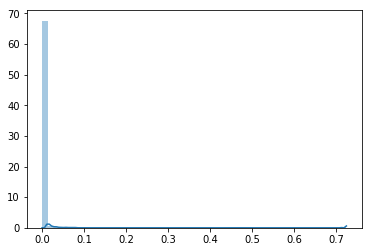

In [229]:
sns.distplot(predictions)

In [221]:
pred[pred==1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [233]:
sub=pd.DataFrame(columns=['loan_id','m13'])
sub['loan_id']=testmain['loan_id']
sub['m13']=pred
sub.to_csv("C:\\Users\kaushik\Desktop\ML\independence day hackathon\\sub.csv",index=False)

In [318]:
X['debt_to_income_ratio'].max()

64.0